In this notebook I will want to understand how my model works and will use the Random Forest regression model for the Possum dataset that I created before. I copied the notebook Possum dataset - Regression.ipynb.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report,r2_score, mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import preprocessing
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance,PartialDependenceDisplay
from lime.lime_tabular import LimeTabularExplainer
import optuna

The possum data set downloaded from https://www.kaggle.com/datasets/abrambeyer/openintro-possum consists data of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland.The dataset has 14 columns.

In [2]:
#load the data set
data_frame = pd.read_csv('./possum.csv')

In [3]:
#load the first 10 entries in the dataset
data_frame.head(10)

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
5     6     1  Vic   f  1.0     93.1    54.8      90.5   35.5      73.2   
6     7     1  Vic   m  2.0     95.3    58.2      89.5   36.0      71.5   
7     8     1  Vic   f  6.0     94.8    57.6      91.0   37.0      72.7   
8     9     1  Vic   f  9.0     93.4    56.3      91.5   37.0      72.4   
9    10     1  Vic   f  6.0     91.8    58.0      89.5   37.5      70.9   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
5      53.6  14.2   30.0   32.0  
6      52.0  14.2   30.0   34.5  
7      53.9  14.5   29.0   34.0  
8      52.9  15.5   28.0   33.0  
9      53.4  14.4   27.5   32.0

In [4]:
#use the method describe to check data
data_frame.describe().T

count       mean        std   min     25%    50%     75%    max
case      104.0  52.500000  30.166206   1.0  26.750  52.50  78.250  104.0
site      104.0   3.625000   2.349086   1.0   1.000   3.00   6.000    7.0
age       102.0   3.833333   1.909244   1.0   2.250   3.00   5.000    9.0
hdlngth   104.0  92.602885   3.573349  82.5  90.675  92.80  94.725  103.1
skullw    104.0  56.883654   3.113426  50.0  54.975  56.35  58.100   68.6
totlngth  104.0  87.088462   4.310549  75.0  84.000  88.00  90.000   96.5
taill     104.0  37.009615   1.959518  32.0  35.875  37.00  38.000   43.0
footlgth  103.0  68.459223   4.395306  60.3  64.600  68.00  72.500   77.9
earconch  104.0  48.130769   4.109380  40.3  44.800  46.80  52.000   56.2
eye       104.0  15.046154   1.050374  12.8  14.400  14.90  15.725   17.8
chest     104.0  27.000000   2.045597  22.0  25.500  27.00  28.000   32.0
belly     104.0  32.586538   2.761949  25.0  31.000  32.50  34.125   40.0

In [5]:
#check unique values for the columns "Site" and "Pop"
print(data_frame['site'].unique(), data_frame['Pop'].unique())

[1 2 3 4 5 6 7] ['Vic' 'other']


### Features
1. Case - observation number - numerical data 1-104,
2. Site - the site number where the possum was trapped - categorical data (1, 2, 3, 4, 5, 6, 7),
3. Pop - Population, either Vic (Victoria) or other (New South Wales or Queensland) - categorical data,
4. Sex - Gender, either m (male) or f (female) - categorical data,
5. Age - age of possum - numerical data, 1-9,
6. Hdlngth - Head length (mm) - numerical data (82.5 - 103.1),
7. Skullw - Skull width (mm) - numerical data (50.0 - 68.6),
8. Totlngth - Total length (cm) - numerical data (75.0 - 96.5),
9. Taill - Tail length (cm) - numerical data (32.0 - 43.0),
10. Foot lengt - numerical data (60.3 - 77.9),
11. Earconch - ear conch length - numerical data (40.3 - 56.2),
12. Eye - distance from medial canthus to lateral canthus of right eye - numerical data (12.8 - 18.8),
13. Chest - chest girth (cm) - numerical data (22.0 - 32.0),
14. Belly - belly girth (cm) - numerical data (25.0 - 40.0).

In [6]:
#use the info method to check dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
#count missing observations
data_frame.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Usuing `info()` and `isnull` method we know that almost each column has 104 rows. It seems that we missing 2 rows data in the column "age" and 1 row is missing in the column "footlgth". I decided to fill missing observations with the mean values in the columns.

In [8]:
#create a new dataframe with mean value for each column
column_means = data_frame.mean(numeric_only=True)

In [9]:
#fill NA values with the mean values
data_frame = data_frame.fillna(column_means)

### The possum populations

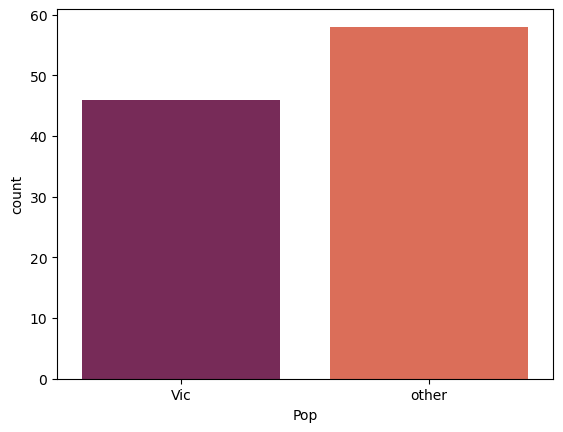

In [10]:
ax = sns.countplot(x='Pop', data=data_frame, palette="rocket")
plt.show()

In [11]:
#check the population sizes
populations = data_frame['Pop'].value_counts()
populations

other    58
Vic      46
Name: Pop, dtype: int64

Most of the possums in the dataset are from the Victoria population, beacuse two populations are included in "Other": New South Wales or Queensland, and 58 possums are from these two populations, while 43 possums are from the Victoria population.

In [12]:
# label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
# encode labels in column 'Pop'
data_frame['Pop']= label_encoder.fit_transform(data_frame['Pop'])

### Possums gender

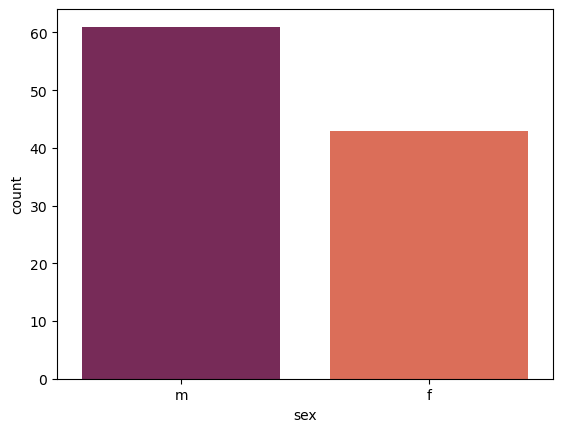

In [13]:
ax = sns.countplot(x='sex', data=data_frame, palette="rocket")
plt.show()

In [14]:
#check genders sizes
gender = data_frame['sex'].value_counts()
gender

m    61
f    43
Name: sex, dtype: int64

Most of the possums in the dataset are male - 59. There are 42 females possums in the dataset.
#### Check if the age and dimenssion of the possum is dependent on its gender

In [15]:
#create a data frame only with age and possum dimensions
numerical_cols = data_frame.drop(['case','site','Pop', 'sex'], axis=1)

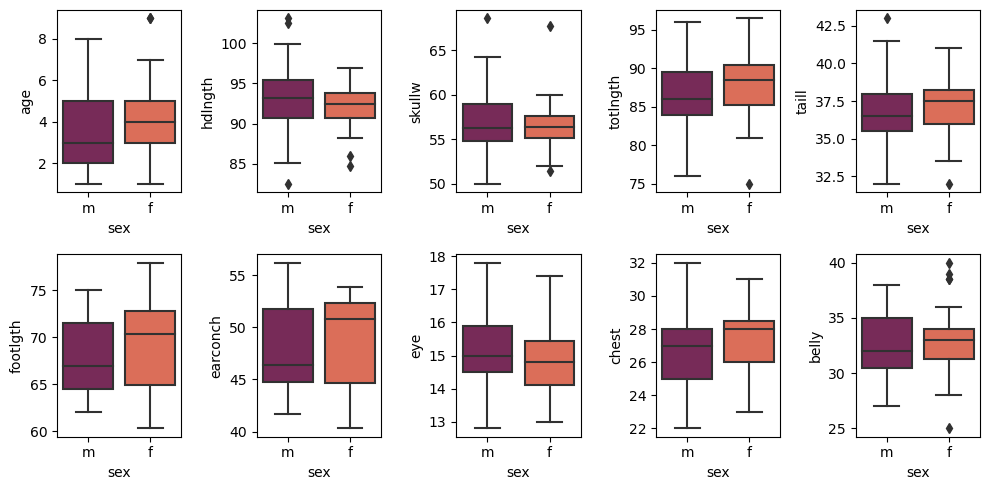

In [16]:
#plot boxplot for columns age and the columns with possum dimensions
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(x='sex', y=k, data=data_frame, ax=axs[index], palette="rocket")
    index = index + 1
plt.tight_layout()

From the above boxplots we can infer that female possums are longer than male possums, they have also longer foots. Tails are of similar length in both genders. Head length of the female possums appears to be quite a bit shorter than in the males possums. The age of the male possum in the dataset is from the range 0-8, the female is from the range 0-7, but there is one outlier - the feamle possum at the age of 9.
#### Let's check if the total length actually depends on possum gender.

In [17]:
#perform one-way ANOVA test
groups = []
for category, group in data_frame.groupby('sex'):
    groups.append(group['totlngth'])
    
statistic, p_value = f_oneway(*groups)

In [18]:
#make a hypothesis and interpret results
alpha = 0.05
if p_value < alpha:
    print('The possum total length depends on the possum gender')
else:
    print('The possum total length does not depend on the possum gender')

The possum total length does not depend on the possum gender


Based on the boxplots, it appears that female possums are longer than male possums. However, when using a one-way ANOVA test to determine if there is a statistically significant difference between the total length of possums based on their gender, the test resulted in a p-value greater than the chosen significance level (typically 0.05), meaning we fail to reject the null hypothesis. The null hypothesis in this case is that the possum total length does not depend on the possum gender.

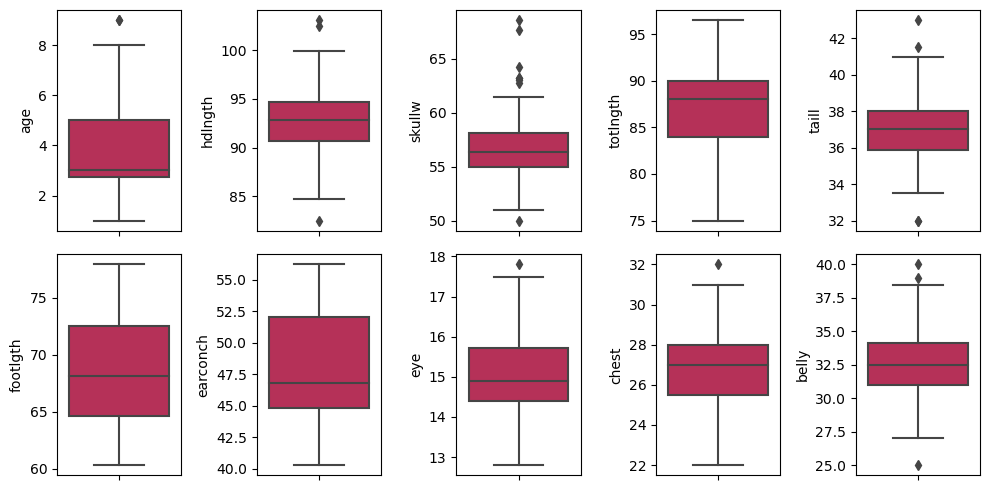

In [19]:
#plot boxplot for columns age and the columns with possum dimensions to check outliers
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(y=k, data=data_frame, ax=axs[index], palette="rocket")
    index = index + 1
plt.tight_layout()

In [20]:
#create a function to detect and replace the outliers with the median values
def impute_outliers_IQR(data_frame):
    q1=data_frame.quantile(0.25)
    q3=data_frame.quantile(0.75)
    IQR=q3-q1
    upper = data_frame[~(data_frame>(q3+1.5*IQR))].max()
    lower = data_frame[~(data_frame<(q1-1.5*IQR))].min()
    data_frame = np.where(data_frame > upper,data_frame.median(),np.where(data_frame < lower,data_frame.median(),data_frame))
    return data_frame

In [21]:
#replace outliers
data_frame[['hdlngth','skullw',
            'totlngth','taill', 'eye',
            'chest','belly', 
    ]] = impute_outliers_IQR(data_frame[['hdlngth','skullw',
                                        'totlngth','taill', 'eye',
                                            'chest','belly', ]])

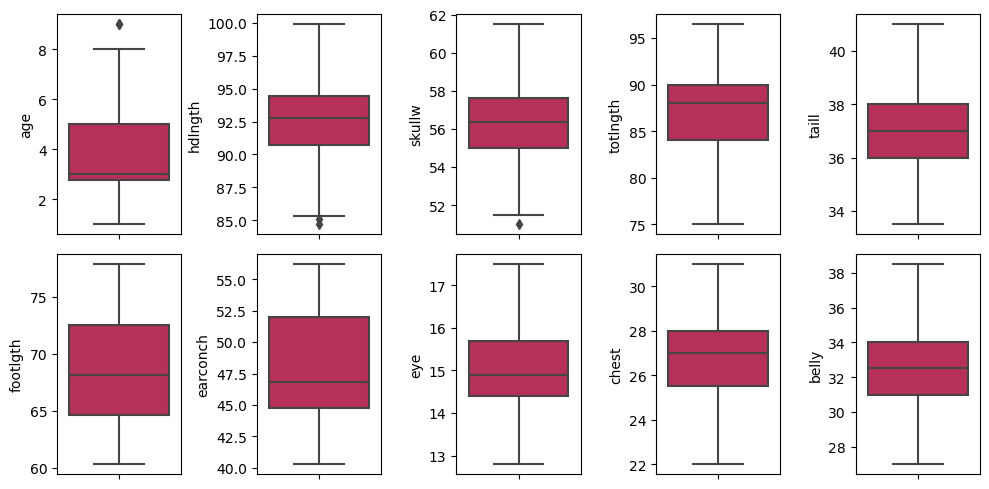

In [22]:
#plot boxplot for columns age and the columns with possum dimensions to check how they look after replacing outliers
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(y=k, data=data_frame, ax=axs[index], palette="rocket")
    index = index + 1
plt.tight_layout()

In [23]:
# label encoding for categorical data in "sex" column
label_encoder = preprocessing.LabelEncoder()
# encode labels in column 'sex'
data_frame['sex']= label_encoder.fit_transform(data_frame['sex'])

I am going to predict possum total lenght. I will use models KNN and SVM for regression. For each of them I will manually set the hyperparameters. But before I start prediction I decided to remove the column "case" from the dataset, beacuse it is an observation number, so the feature won't be informative.

In [24]:
#remove the "case" column
data_frame = data_frame.drop('case', axis=1)

In [25]:
#define the target and the features
target = 'totlngth'
X = data_frame.drop(target,axis=1).copy()#features
y = data_frame[target].copy() #target

### K-nearest neighbors 

For the KNN model I will select 8 features for my model using `SequentialFeatureSelector`

In [26]:
#create the KNN model, scaler and piepline for Sequential Feature Selector
knn = KNeighborsRegressor()
scaler = StandardScaler()
pipe_knn = Pipeline([("scaler", scaler), ("knn", knn)])

In [27]:
#create and fit Sequential Feature Selector
sfs_forward = SequentialFeatureSelector(
    pipe_knn, n_features_to_select=8, direction="forward").fit(X,y)

In [28]:
#check the selected features names
X.columns[sfs_forward.get_support()]

Index(['site', 'sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'eye',
       'chest'],
      dtype='object')

In [29]:
selected_columns = X.columns[sfs_forward.get_support()]

In [30]:
# split the dataset into train and test data with only selected columns
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.33, random_state=42)

In [31]:
#create a model with hyperparameter n_neighbors=3 and the scaler 
knn = KNeighborsRegressor(n_neighbors=3)
scaler = StandardScaler()

In [32]:
#make a pipeline
pipe_knn = Pipeline([("scaler", scaler), ("knn", knn)])

In [33]:
pipe_knn.fit(X_train, y_train)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

In [34]:
#check the MAE on train and test data for the model with hyperparameter n_neighbors=3
y_pred_knn = pipe_knn.predict(X_test)
y_fitted_knn = pipe_knn.predict(X_train)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train, y_fitted_knn)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test, y_pred_knn)}")

Mean Absolute Error on train: 1.555555555555555
Mean Absolute Error on test: 2.3580952380952382


In [35]:
#create a model with hyperparameter n_neighbors=7 and the scaler 
knn_7 = KNeighborsRegressor(n_neighbors=7)
scaler = StandardScaler()

In [36]:
#make a pipeline
pipe_knn_7 = Pipeline([("scaler", scaler), ("knn", knn_7)])

In [37]:
pipe_knn_7.fit(X_train, y_train)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=7))])

In [38]:
#check the MAE on tran and test data for the model with hyperparameter n_neighbors=7
y_pred_knn_7 = pipe_knn_7.predict(X_test)
y_fitted_knn_7 = pipe_knn_7.predict(X_train)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train, y_fitted_knn_7)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test, y_pred_knn_7)}")

Mean Absolute Error on train: 2.0320910973084887
Mean Absolute Error on test: 2.197551020408163


In [39]:
#create a model with hyperparameter n_neighbors=10 and the scaler 
knn_10 = KNeighborsRegressor(n_neighbors=10)
scaler = StandardScaler()

In [40]:
#make a pipeline
pipe_knn_10 = Pipeline([("scaler", scaler), ("knn", knn_10)])

In [41]:
pipe_knn_10.fit(X_train, y_train)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

In [42]:
#check the MAE on tran and test data for the model with hyperparameter n_neighbors=10
y_pred_knn_10 = pipe_knn_10.predict(X_test)
y_fitted_knn_10 = pipe_knn_10.predict(X_train)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train, y_fitted_knn_10)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test, y_pred_knn_10)}")

Mean Absolute Error on train: 2.1963768115942033
Mean Absolute Error on test: 2.129999999999999


### Support Vector Machines - SVM Regressor
Now I am going to do the same using SVM regressor (SVR) model, for feature selection I will also use `SequentialFeatureSelector` but with the "backward" direction.

In [43]:
#create a scaler, model and a pipeline for SequentialFeatureSelector
scaler_svm = StandardScaler()
svm = SVR()
pipeline_svm = Pipeline([("scaler_svm", scaler_svm), ("svm", svm)])

In [44]:
#create Sequential Feature Selector for pipeline_svm 
sfs_forward_svm = SequentialFeatureSelector(
    pipeline_svm, n_features_to_select=8, direction="backward").fit(X,y)

In [45]:
#check the slected features columns names
X.columns[sfs_forward_svm.get_support()]

Index(['site', 'hdlngth', 'skullw', 'taill', 'footlgth', 'eye', 'chest',
       'belly'],
      dtype='object')

In [46]:
selected_columns_svm = X.columns[sfs_forward_svm.get_support()]

In [47]:
# create the test and train dataset for selected columns for SVR
X_train_svm, X_test_svm, y_train_svm, y_test_svm= train_test_split(X[selected_columns_svm], y, test_size=0.30, random_state=42)

In [48]:
#create a SVR model with hyperparameter C=0.5 and the scaler 
svm_05 = SVR(C=0.5)
scaler = StandardScaler()

In [49]:
#make a pipeline
pipe_svm_05 = Pipeline([("scaler", scaler), ("svm", svm_05)])

In [50]:
pipe_svm_05.fit(X_train_svm, y_train_svm)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=0.5))])

In [51]:
#check the MAE on tran and test data for the SVR model with hyperparameter C=2
y_pred_svm_05 = pipe_svm_05.predict(X_test_svm)
y_fitted_svm_05 = pipe_svm_05.predict(X_train_svm)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train_svm, y_fitted_svm_05)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test_svm, y_pred_svm_05)}")

Mean Absolute Error on train: 2.469198344374548
Mean Absolute Error on test: 2.57281981284293


In [52]:
#create a SVR model with hyperparameter C=1.5 and the scaler 
svm_1_5 = SVR(C=1.5)
scaler = StandardScaler()

In [53]:
#make a pipeline
pipe_svm_1_5 = Pipeline([("scaler", scaler), ("svm", svm_1_5)])

In [54]:
pipe_svm_1_5.fit(X_train_svm, y_train_svm)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=1.5))])

In [55]:
#check the MAE on tran and test data for the SVR model with hyperparameter C=1.5
y_pred_svm_1_5 = pipe_svm_1_5.predict(X_test_svm)
y_fitted_svm_1_5 = pipe_svm_1_5.predict(X_train_svm)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train_svm, y_fitted_svm_1_5)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test_svm, y_pred_svm_1_5)}")

Mean Absolute Error on train: 1.6602560811320661
Mean Absolute Error on test: 2.0911576578670155


In [56]:
#create a SVR model with hyperparameter C=5 and the scaler 
svm_5 = SVR(C=5)
scaler = StandardScaler()

In [57]:
#make a pipeline
pipe_svm_5 = Pipeline([("scaler", scaler), ("svm", svm_5)])

In [58]:
pipe_svm_5.fit(X_train_svm, y_train_svm)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=5))])

In [59]:
#check the MAE on tran and test data for the SVR model with hyperparameter C=5
y_pred_svm_5 = pipe_svm_5.predict(X_test_svm)
y_fitted_svm_5 = pipe_svm_5.predict(X_train_svm)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train_svm, y_fitted_svm_5)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test_svm, y_pred_svm_5)}")

Mean Absolute Error on train: 0.960764288175616
Mean Absolute Error on test: 2.0997229296296043


In [60]:
r2_knn = r2_score(y_test, y_pred_knn)
r2_knn_7 = r2_score(y_test, y_pred_knn_7)
r2_knn_10 = r2_score(y_test, y_pred_knn_10)

In [61]:
print("R-squared Score for KNN 3 neighbor: ", r2_knn)
print("R-squared Score for KNN 7 neighbor: ", r2_knn_7)
print("R-squared Score for KNN 10 neighbor: ", r2_knn_10)

R-squared Score for KNN 3 neighbor:  0.3739208821144072
R-squared Score for KNN 7 neighbor:  0.418841655635796
R-squared Score for KNN 10 neighbor:  0.42255889758305887


In [62]:
r2_svm_01 = r2_score(y_test_svm,y_pred_svm_05)
r2_svm_1_5 = r2_score(y_test_svm,y_pred_svm_1_5)
r2_svm_5 = r2_score(y_test_svm,y_pred_svm_5)

In [63]:
print("R-squared Score for the SVR model and hyperparameter C=0.5: ", r2_svm_01)
print("R-squared Score for the SVR model and hyperparameter C=1.5: ", r2_svm_1_5)
print("R-squared Score for the SVR model and hyperparameter C=5: ", r2_svm_5)

R-squared Score for the SVR model and hyperparameter C=0.5:  0.28233767573988644
R-squared Score for the SVR model and hyperparameter C=1.5:  0.480186005296364
R-squared Score for the SVR model and hyperparameter C=5:  0.4788155732025501


Neither model resutled with satisfactory results. All of them have R2 score below 50%. Now I will do the same but using Random Forest to see if it is the data or maybe the model I used didn't work fot the dataset.

### Random Forest 

In [64]:
#define the objective function to search the best parameters using the optuna library
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    
    #create a RandomForestRegressor with the hyperparameters
    rf_regressor = RandomForestRegressor(**params,  random_state=42)
    rf_regressor.fit(X_train, y_train)
    #perform cross-validation with the Random Forest Regressor
    #predict on test data
    y_pred = rf_regressor.predict(X_test)
    return mean_absolute_percentage_error(y_test, y_pred)

In [65]:
#create a study object for the optimization process 
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)#optimization process 

[I 2023-07-17 19:37:43,499] A new study created in memory with name: regression
[I 2023-07-17 19:37:44,137] Trial 0 finished with value: 0.026994480238191048 and parameters: {'n_estimators': 900, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.026994480238191048.
[I 2023-07-17 19:37:44,691] Trial 1 finished with value: 0.0269064753577483 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.0269064753577483.
[I 2023-07-17 19:37:45,387] Trial 2 finished with value: 0.02790838939215724 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.0269064753577483.
/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 

[I 2023-07-17 19:37:49,737] Trial 17 finished with value: 0.026226900872720345 and parameters: {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 8 with value: 0.025647919517083374.
/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-07-17 19:37:49,981] Trial 18 finished with value: 0.025604403272731592 and parameters: {'n_estimators': 300, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 18 with value: 0.025604403272731592.
/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_f

[I 2023-07-17 19:37:54,828] Trial 34 finished with value: 0.02492773084344548 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.02492773084344548.
[I 2023-07-17 19:37:54,981] Trial 35 finished with value: 0.026758648101628132 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.02492773084344548.
[I 2023-07-17 19:37:55,324] Trial 36 finished with value: 0.025298412544242643 and parameters: {'n_estimators': 400, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.02492773084344548.
[I 2023-07-17 19:37:55,732] Trial 37 finished with value: 0.02563626152117291 and parameters: {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.

[I 2023-07-17 19:37:59,436] Trial 65 finished with value: 0.02567502075427645 and parameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.024528134087772546.
[I 2023-07-17 19:38:00,027] Trial 66 finished with value: 0.02602507964837288 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 39 with value: 0.024528134087772546.
[I 2023-07-17 19:38:00,126] Trial 67 finished with value: 0.024528134087772546 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.024528134087772546.
[I 2023-07-17 19:38:00,282] Trial 68 finished with value: 0.024837226872244707 and parameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 39 with value

[I 2023-07-17 19:38:05,142] Trial 96 finished with value: 0.024528134087772546 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.024528134087772546.
[I 2023-07-17 19:38:05,295] Trial 97 finished with value: 0.02544596127293184 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.024528134087772546.
[I 2023-07-17 19:38:05,534] Trial 98 finished with value: 0.025450774638098878 and parameters: {'n_estimators': 300, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.024528134087772546.
[I 2023-07-17 19:38:05,690] Trial 99 finished with value: 0.024837226872244707 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 39 with val

In [66]:
#create Random Forest Regressor model using the best parameters
rf_regressor = RandomForestRegressor(**study.best_params, random_state=42)
rf_regressor.fit(X_train, y_train)#train the model
y_fitted_rf = rf_regressor.predict(X_train)#fit the model
y_pred_rf = rf_regressor.predict(X_test)# make a prediction

In [67]:
#check R2 score for the model
print(r2_score(y_test,y_pred_rf))

0.49427727622272444


The Random Forest model also didn't get the satisfactory result. The R2 score is about 0,5. So probably it's not a problem with the models, maybe it is the dataset. Let's check correlation in the dataset and plot a scatterplot for each pair of variables to check how the data looks.

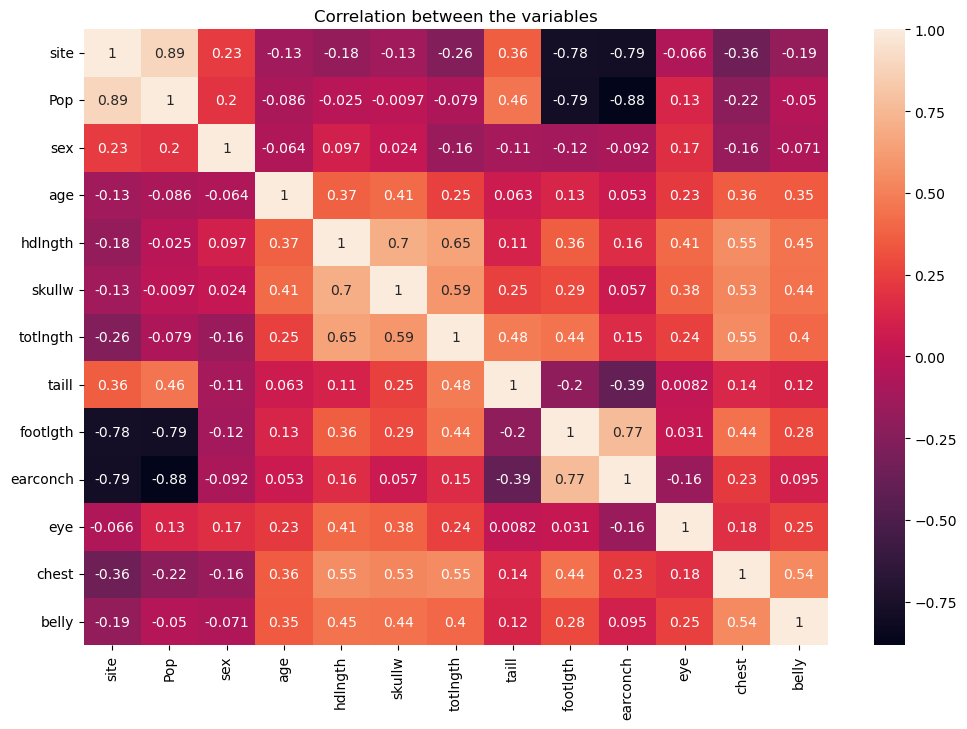

In [68]:
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(data_frame.corr(numeric_only=True), cmap="rocket", annot=True)
plt.title('Correlation between the variables')
plt.show()

Checking the correlation between target variable and the features we can see that the highest correlation with the target have the features "head lenght" and "skull weight" 0,65 and 0,59, but porbably those two features with good/average correlation may not capture all the relevant information for accurately predicting the target variable.

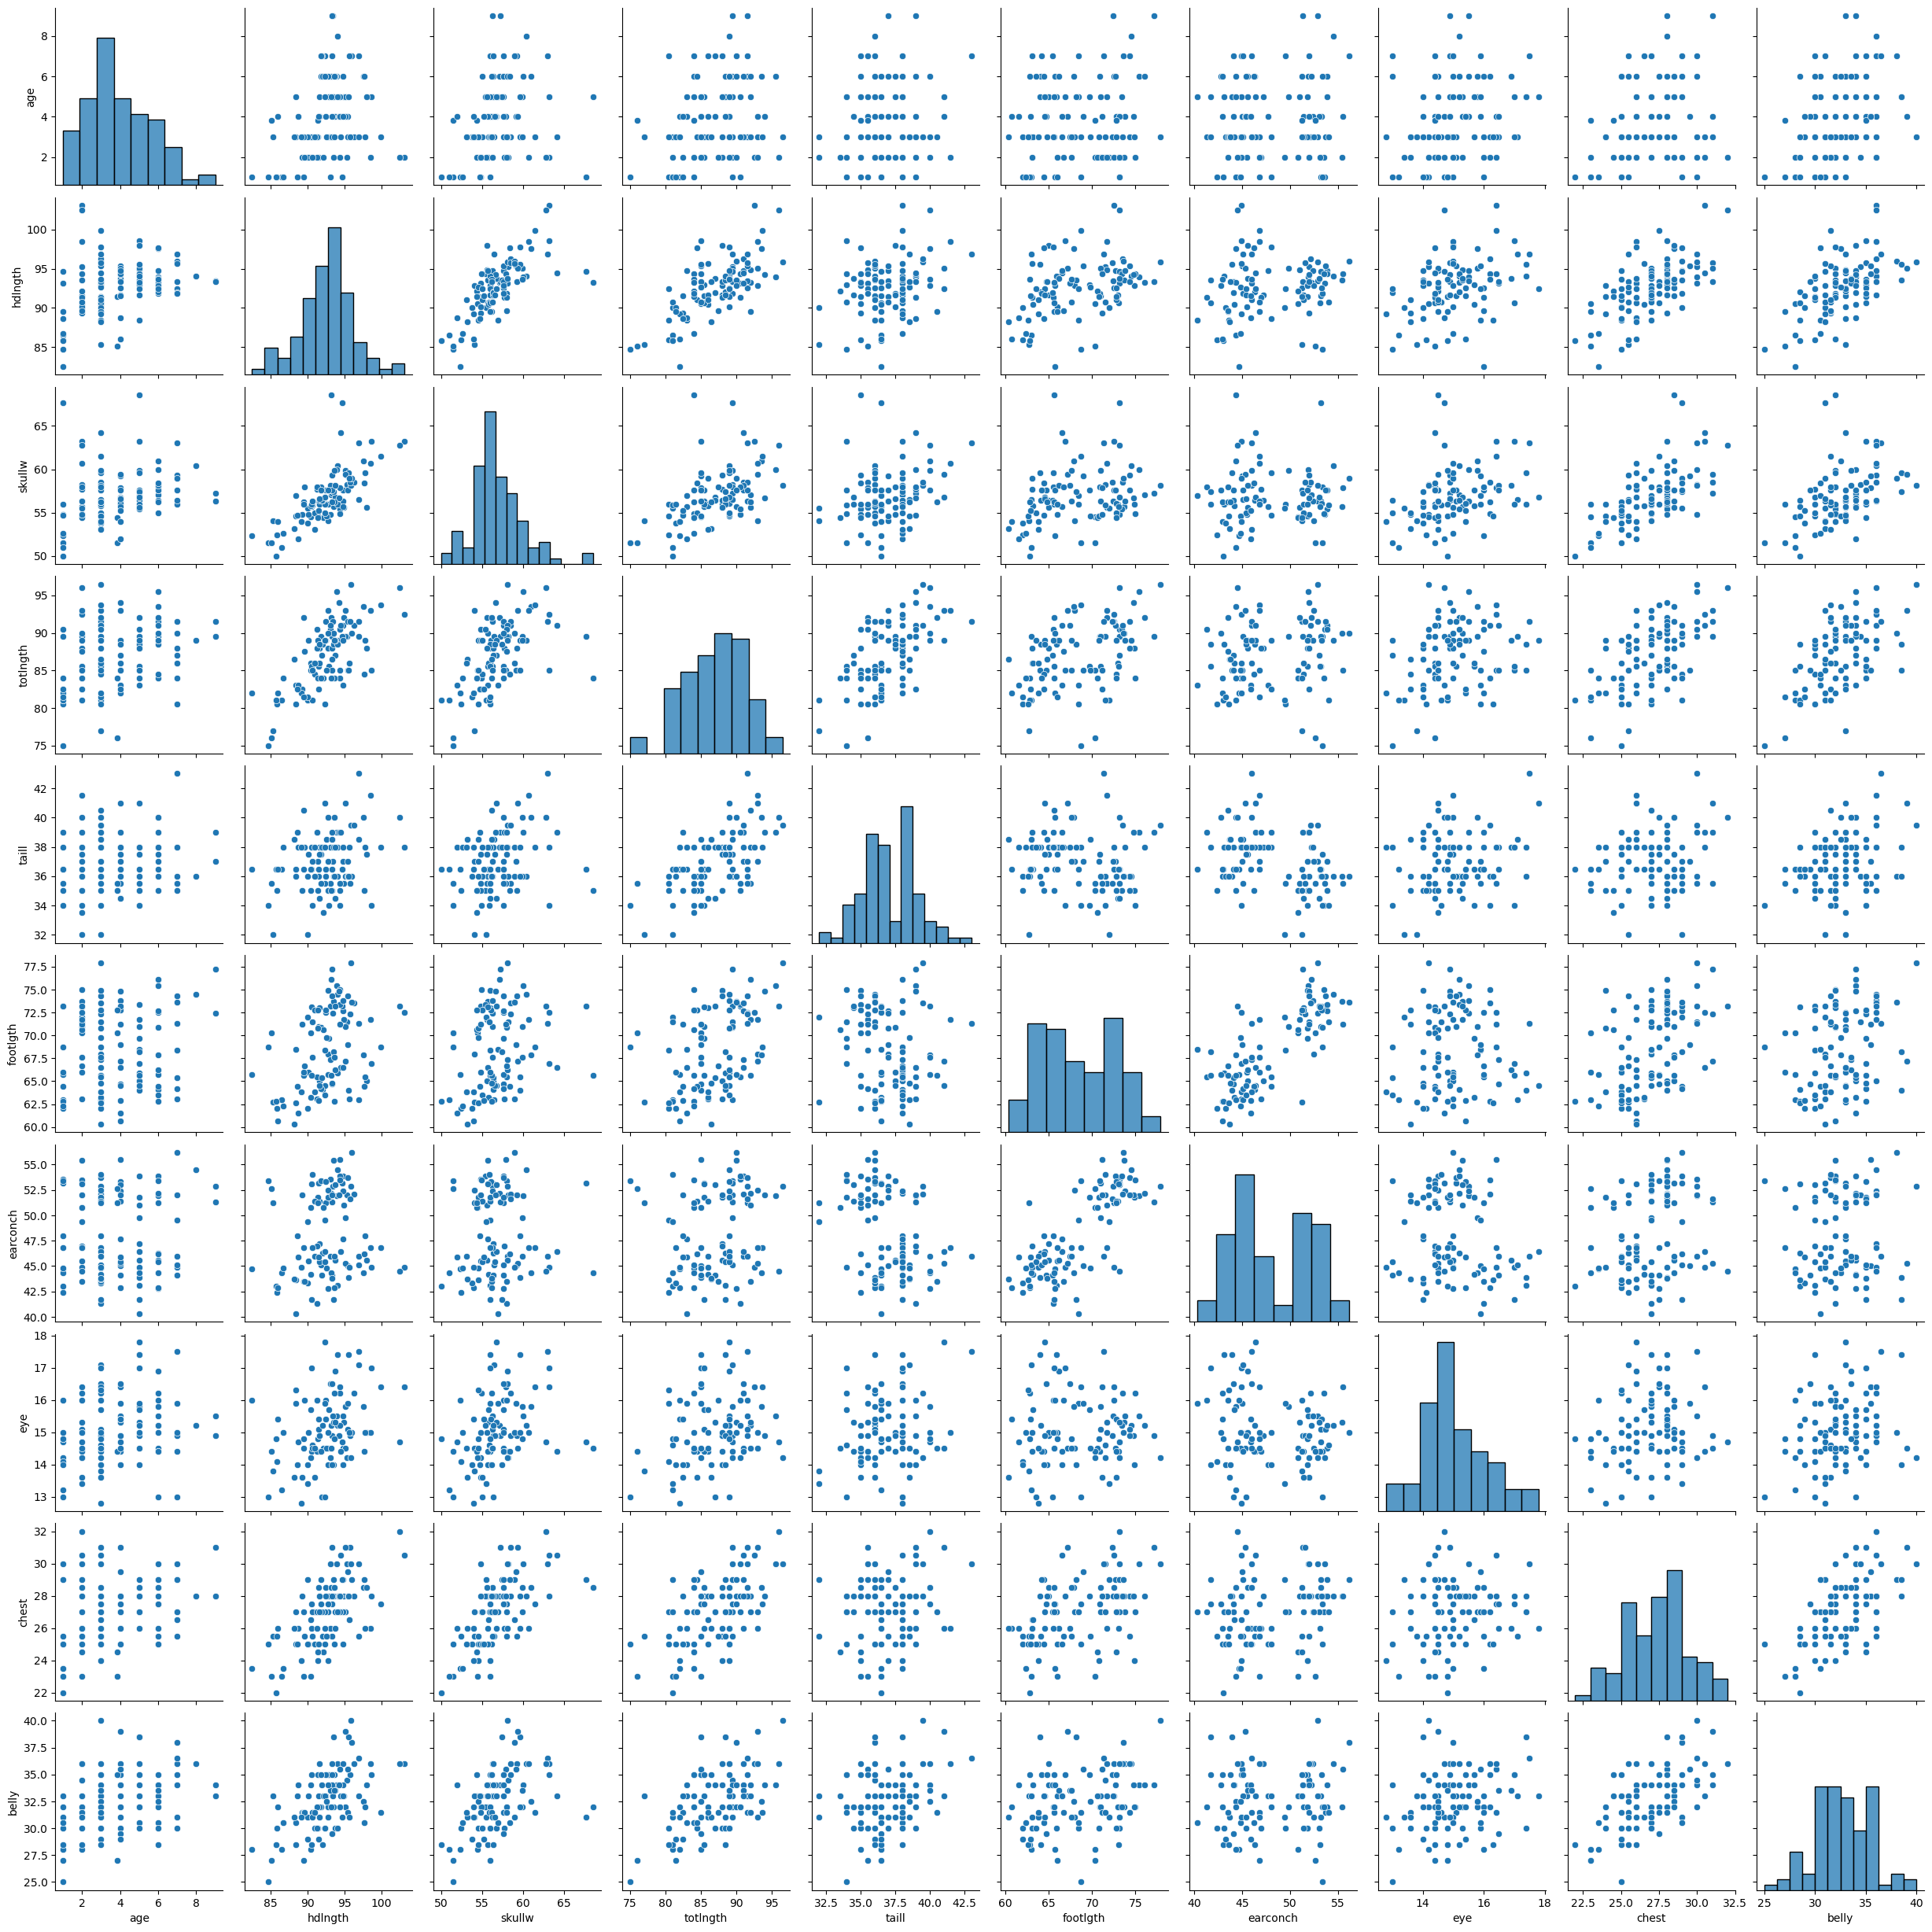

In [69]:
#plot a pairplot (a scatterplot for each pair of variables)
sns.pairplot(numerical_cols)
plt.show()

Looking at points in the scatter plot almost all of them appear scattered randomly with no discernible pattern, it suggests no significant relationship between the variables.
### Conclusion
The size of the dataset might not be enough to accurately capture the relationships between the features and the target variable. Having only 104 observations is probably difficult to catch the complexity and variability of possum characteristics. Increasing the sample size through data collection efforts could provide a better results.

### Explainability
Let's use some data explainability techniques to understand how the model's end result is reached. First I am going to check the Gini Importance.

In [70]:
#Feature importance
feature_names = [f"feature {i}" for i in range(X_test.shape[1])]
importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)

In [71]:
feature_names_2 = X_test.columns

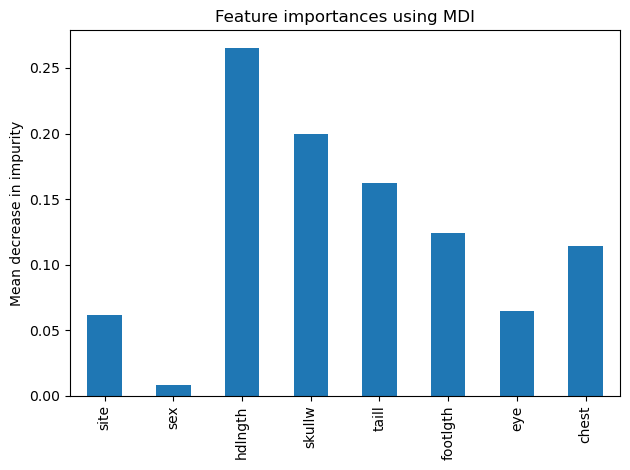

In [72]:
forest_importances = pd.Series(importances, feature_names_2)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The most important features are:
<br> Head length,
<br> Skull width, 
<br> Tail lenght,
<br> Foot lenght,
<br> Chest.
<br> Eye and site are less important, and the least important feature is sex.<br><br>
Next I am going to use Permutation importance from sklearn.

In [73]:
r = permutation_importance(rf_regressor, X_test, y_test,n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
                           if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                               print(f"{feature_names_2[i]:<8}"
                                     f"{r.importances_mean[i]:.3f}"
                                     f" +/- {r.importances_std[i]:.3f}")

hdlngth 0.187 +/- 0.070
taill   0.138 +/- 0.053
site    0.089 +/- 0.024
footlgth0.072 +/- 0.034


The results of the permutation feature importance tell us that the biggest drivers of model predictions are the variables:<br>
Head length,<br>Tail lenght, <br>Site,<br>Foot lenght.<br>
The results are slightly different from the Gini Importance.<br><br>
Let's check Partial Dependence Plot.

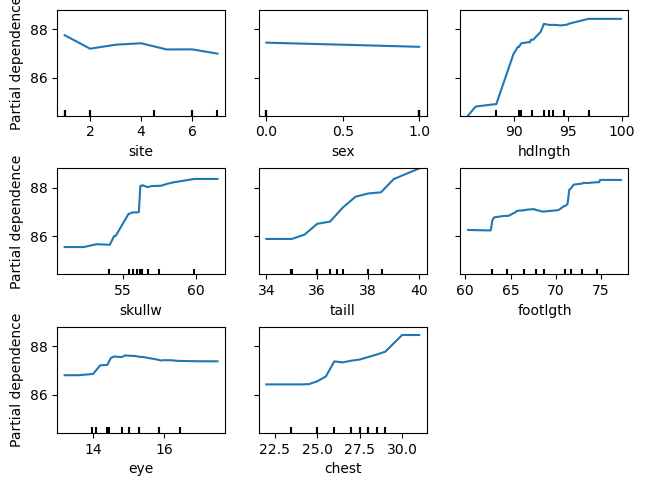

In [74]:
PartialDependenceDisplay.from_estimator(rf_regressor, X_test, feature_names_2)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(hspace=0.5)

The above partial dependence plots provide us insights on how predictions can be impacted by the change in features. The relationship for the variables "sex" "site" and "eye" looks to be a constant while for the variables "Head length", "Skull width", "Tail lenght", "Foot lenght" we can see the strong dependency. The results of partial dependence plots are pretty similar to Gini Importance results.<br><br>
Now I am going to use LIME to explain predictions locally. I will choose 3 instances and use them to explain the predictions.

In [75]:
#Create LIME object
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['medv'], 
                                 verbose=True, mode='regression')

In [76]:
# Explain a prediction
i = 9  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], rf_regressor.predict, num_features=8)
 
# Print the explanation
print('Instance:', i)
print('Prediction:', y_pred_rf[i])
exp.show_in_notebook(show_table=True)

Intercept 86.55682046441216
Prediction_local [89.09321801]
Right: 90.02213103563103
Instance: 9
Prediction: 90.02213103563103


/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predicted value of the possum total length is 89.87. The chart is sorted from the most important features to the least important.
The variables "Tail lenght" and "Sex" have negative influence while "Foot lenght", "Skull width", "Head lenght", "Site" and "Eye" have positive influence on predicted value.
In this instance the least important variables are "eye", "sex" and "chest" and the most importnant variables are "Tail lenght", "Foot lenght", "Skull width", "Head lenght".

In [77]:
# Explain a prediction
i = 19  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], rf_regressor.predict, num_features=8)
 
# Print the explanation
print('Instance:', i)
print('Prediction:', y_pred_rf[i])
exp.show_in_notebook(show_table=True)

Intercept 88.73820257950233
Prediction_local [82.28358278]
Right: 84.19071717171717
Instance: 19
Prediction: 84.19071717171717


/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


For the second instance the predicted value of the possum total length is 84.62. The chart is sorted from the most important features to the least important and we can see that the least important variable is "Foot lenght" which was one of the most important in the first instance.
The variables  "Head lenght", "Skull width", "Tail lenght","Chest" and "Eye" have negative influence while "Site" "Sex", "Foot lenght" and "Eye" have positive influence on predicted value.

In [78]:
# Explain a prediction
i = 5  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], rf_regressor.predict, num_features=8)
 
# Print the explanation
print('Instance:', i)
print('Prediction:', y_pred_rf[i])
exp.show_in_notebook(show_table=True)

Intercept 87.35996416126883
Prediction_local [86.23355764]
Right: 86.36988293650793
Instance: 5
Prediction: 86.36988293650793


/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


For the third instance the predicted value of the possum total length is 86.02. The chart is sorted from the most important features ("Tail lenght", "Foot lenght","Skull width", "Chest") to the least important ("Eye", "Head lenght", "Site", "Sex"). The variables "Skull width", "Chest" and "Head lenght" have positive influence while the variables "tail lenght", "foot lenght", "Eye", "Site" and "Sex" have negative influence on predicted value.
### Summary
All the methods I used resulted in similar findings, that my Random Forest Regression model make decisions based on variables  "Head length", "Skull width", "Tail lenght" and "Foot lenght". The variables "Sex" "Site", "Eye" and "Chest" are of little or no importance.